<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import pyAgrum.skbn as skbn
import pyAgrum.lib.notebook as gnb

import os
import pandas

# Initialization of parameters

First, we initialize the parameters to indicate properties we want our classifier to have.

In [2]:
BNTest= skbn.BNClassifier(learningMethod = 'Chow-Liu', aPriori= 'Smoothing', aPrioriWeight = 0.5, 
                          discretizationStrategy = 'quantile', usePR = True, significant_digit = 13)

Then, we train the classifier thanks to two types of objects.

# Learn from csv file

In [3]:
BNTest.fit(filename = 'res/creditCardTest.csv', targetName = 'Class')

In [4]:
for i in BNTest.bn.nodes():
    print(BNTest.bn.variable(i))

Class:Labelized({0.0|1.0})
Time:Discretized(<(0;1578[,[1578;3733[,[3733;6982[,[6982;11033[,[11033;170348)>)
V1:Discretized(<(-30.5524;-1.33295[,[-1.33295;-0.654664[,[-0.654664;0.305375[,[0.305375;1.18346[,[1.18346;2.13239)>)
V2:Discretized(<(-25.6405;-0.362408[,[-0.362408;0.104022[,[0.104022;0.582468[,[0.582468;1.12626[,[1.12626;22.0577)>)
V3:Discretized(<(-31.1037;0.107723[,[0.107723;0.675277[,[0.675277;1.14525[,[1.14525;1.73106[,[1.73106;4.10172)>)
V4:Discretized(<(-4.65755;-0.835683[,[-0.835683;0.0334235[,[0.0334235;0.648386[,[0.648386;1.44563[,[1.44563;12.1147)>)
V5:Discretized(<(-22.1055;-0.813666[,[-0.813666;-0.355923[,[-0.355923;0.0329468[,[0.0329468;0.534605[,[0.534605;11.9743)>)
V6:Discretized(<(-7.5748;-0.789778[,[-0.789778;-0.370597[,[-0.370597;0.0353554[,[0.0353554;0.711815[,[0.711815;10.0339)>)
V7:Discretized(<(-43.5572;-0.691953[,[-0.691953;-0.264738[,[-0.264738;0.111993[,[0.111993;0.57616[,[0.57616;12.2192)>)
V8:Discretized(<(-41.0443;-0.248778[,[-0.248778;-0.0618973[,[-

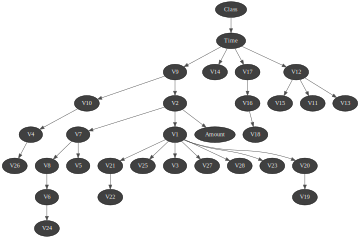

In [5]:
gnb.showBN(BNTest.bn)

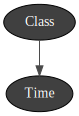

In [6]:
gnb.showBN(BNTest.MarkovBlanket) 

# Learn from array-likes

We use a method to transform the csv file in two array-likes in order to train from the same database.

In [7]:
#we use now another method to learn the BN (MIIC)
BNTest= skbn.BNClassifier(learningMethod = 'MIIC', aPriori= 'Smoothing', aPrioriWeight = 0.5, 
                          discretizationStrategy = 'quantile', usePR = True, significant_digit = 13)

xTrain, yTrain = BNTest.XYfromCSV(filename = 'res/creditCardTest.csv', target = 'Class')

In [8]:
BNTest.fit(xTrain, yTrain)

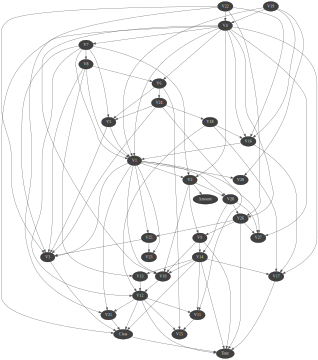

In [9]:
gnb.showBN(BNTest.bn)

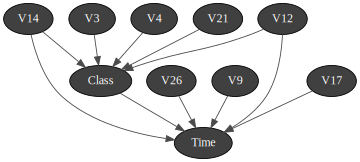

In [10]:
gnb.showBN(BNTest.MarkovBlanket) 

# Create a classifier from a Bayesian network

If we already have a Bayesian network with learned parameters, we can create a classifier that uses it. In this case we do not have to train the classifier on data since it the Bayesian network is already trained.

In [11]:
ClassfromBN = skbn.BNClassifier(significant_digit = 7)

In [12]:
ClassfromBN.fromTrainedModel(bn = BNTest.bn, targetAttribute = 'Class', targetModality = '1.0', 
                             threshold = BNTest.threshold, variableList = xTrain.columns.tolist())

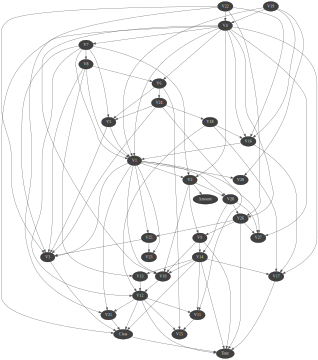

In [13]:
gnb.showBN(ClassfromBN.bn)

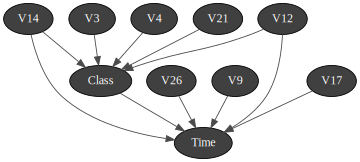

In [14]:
gnb.showBN(ClassfromBN.MarkovBlanket)

Then, we work with functions from scikit-learn like score.
We can also call it with a csv file or two array-likes.

In [15]:
xTest, yTest = ClassfromBN.XYfromCSV(filename = 'res/creditCardTest.csv', target = 'Class')

# Prediction with csv file

In [16]:
scoreCSV1 = BNTest.score('res/creditCardTest.csv', y = yTest)
print("{0:.2f}% good predictions".format(100*scoreCSV1)) 

99.77% good predictions


In [17]:
scoreCSV2 = ClassfromBN.score('res/creditCardTest.csv', y = yTest)
print("{0:.2f}% good predictions".format(100*scoreCSV2)) 

99.77% good predictions


## Prediction with array-like

In [18]:
scoreAR1 = BNTest.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100*scoreAR1)) 

99.77% good predictions


In [19]:
scoreAR2 = ClassfromBN.score(xTest, yTest)
print("{0:.2f}% good predictions".format(100*scoreAR2)) 

99.77% good predictions


# ROC and Precision-Recall curves with all methods

In addition (and of  course), we can work with functions from pyAgrum (from  `pyAgrum.lib.bn2roc`).

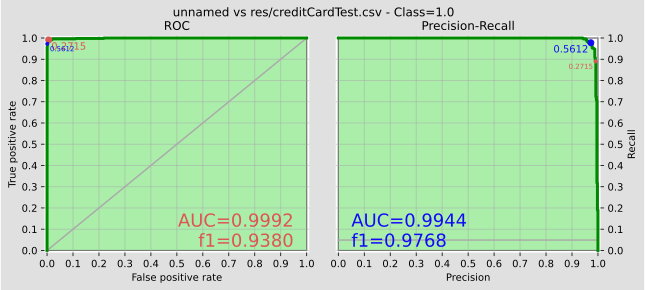

In [20]:
BNTest.showROC_PR('res/creditCardTest.csv')